# Librerias necesarias

En esta parte del proyecto ponemos en práctica lo aprendido sobre procesamiento de lenguaje natural (NLP por sus siglas en inglés).

In [1]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.util import ngrams

# Lectura de Datos

Una vez que importamos los módulos necesarios para nuestro análisis, procedemos a leer el `DataFrame` que resultó del proyecto del módulo anterior. Este `DataFrame` ya se encuentra limpio, sin embargo, para hacer el análisis sobre el campo de `senas_particulares` de nuestro dataset tendremos que hacer un pulido de los registros en esta columna.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/KevinRC55/Proyecto-de-Python-BEDU/main/RNPEDFC_Final.csv', encoding='ISO-8859-1')
df.head()

,anio,fecha,hora,dias_desaparecido,entidad,municipio,localidad,coordenadas,nacionalidad,sexo,edad,estatura,complexion,senas_particulares,discapacidad,dependecia_origen
0,2012,2012-03-18,05:00:00,2234,Sonora,Navojoa,Navojoa,"27.069053, -109.439423",Mexicana,Mujer,7,1.1,Delgada,Tiene Una Cicatriz En La Rodilla Izquierda Por...,Ninguno,FGE - Sonora
1,2007,2007-02-05,02:00:26,4102,Estado De Mexico,Valle De Bravo,Valle De Bravo,"19.16368, -100.134684",Mexicana,Mujer,4,1.1,Delgada,No Especificado,Ninguno,FGJ - Estado De Mexico
2,2009,2009-03-14,08:30:54,3334,Estado De Mexico,Chalco,Chalco,"19.266337, -98.8978",Mexicana,Hombre,6,1.1,Delgada,"Manchas, Parte Superior De Pierna Derecha, Cic...",Ninguno,FGJ - Estado De Mexico
3,2006,2006-12-23,08:00:28,4146,Estado De Mexico,Tlalnepantla De Baz,Tlalnepantla De Baz,"19.547512, -99.193851",Mexicana,Hombre,10,1.1,Delgada,"Lunares, A La Altura De La Cinturaforma De Man...",Ninguno,FGJ - Estado De Mexico
4,2008,2008-01-11,12:00:17,3762,Estado De Mexico,Toluca,Toluca,"18.078, -91.6552",Mexicana,Hombre,4,1.1,Delgada,No Especificado,Ninguno,FGJ - Estado De Mexico


Como se observa de las instrucciones anteriores, nuestra variable `senas_particulares` es apta para realizar un análisis utilizando lo aprendido sobre procesamiento del lenguaje natural con `nltk`.

In [3]:
df['senas_particulares']

0        Tiene Una Cicatriz En La Rodilla Izquierda Por...
1                                          No Especificado
2        Manchas, Parte Superior De Pierna Derecha, Cic...
3        Lunares, A La Altura De La Cinturaforma De Man...
4                                          No Especificado
                               ...                        
35896    Lunar En La Mejilla Y Tatuaje En El Cuello En ...
35897    El Ojo Izquierdo Tiene Un Enfermedad Como Tic,...
35898                                      No Especificado
35899    Tatuaje En El Brazo Izquierdo Con La Imagen De...
35900                                      No Especificado
Name: senas_particulares, Length: 35901, dtype: object

# Uso de patrones RegEx para limpiar datos



De las instrucciones anteriores podemos observar que los registros con un valor de 'No Especificado' no nos serán particularmente útiles para estudiar nuestra variable. Es con este motivo que generamos un `DataFrame` sin los registros que poseen este valor como observación.

In [4]:
senas_part_df = df.loc[df['senas_particulares'] !='No Especificado']
senas_part_df

,anio,fecha,hora,dias_desaparecido,entidad,municipio,localidad,coordenadas,nacionalidad,sexo,edad,estatura,complexion,senas_particulares,discapacidad,dependecia_origen
0,2012,2012-03-18,05:00:00,2234,Sonora,Navojoa,Navojoa,"27.069053, -109.439423",Mexicana,Mujer,7,1.10,Delgada,Tiene Una Cicatriz En La Rodilla Izquierda Por...,Ninguno,FGE - Sonora
2,2009,2009-03-14,08:30:54,3334,Estado De Mexico,Chalco,Chalco,"19.266337, -98.8978",Mexicana,Hombre,6,1.10,Delgada,"Manchas, Parte Superior De Pierna Derecha, Cic...",Ninguno,FGJ - Estado De Mexico
3,2006,2006-12-23,08:00:28,4146,Estado De Mexico,Tlalnepantla De Baz,Tlalnepantla De Baz,"19.547512, -99.193851",Mexicana,Hombre,10,1.10,Delgada,"Lunares, A La Altura De La Cinturaforma De Man...",Ninguno,FGJ - Estado De Mexico
7,2011,2011-06-13,01:00:11,2513,Estado De Mexico,Amecameca,Amecameca,"19.128693, -98.764657",Mexicana,Mujer,7,1.15,Robusta,"Manchas, En El Tobilloderecha Causada Porquema...",Ninguno,FGJ - Estado De Mexico
8,2010,2010-04-24,01:00:47,2928,Estado De Mexico,Teoloyucan,Teoloyucan,"19.751582, -99.171598",Mexicana,Hombre,6,1.15,Delgada,"Cicatrices, En La Caravaricela Pocas",Ninguno,FGJ - Estado De Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35892,2018,2018-04-22,11:30:00,8,Puebla,Puebla,Puebla,"19.051201, -98.212116",Mexicana,Mujer,18,1.52,Delgada,Perforacion En La Lengua Y Mancha Blanca En Me...,Ninguno,FGE - Puebla
35895,2018,2018-04-15,06:30:00,15,Colima,Colima,Colima,"19.242918, -103.709341",Mexicana,Hombre,57,1.59,Robusta,Tiene Una Cicatriz En La Parte Baja De Su Abdo...,Ninguno,PGJ - Colima
35896,2018,2018-04-26,08:00:00,4,Puebla,Puebla,Puebla,"19.051201, -98.212116",Mexicana,Hombre,22,1.60,Delgada,Lunar En La Mejilla Y Tatuaje En El Cuello En ...,Ninguno,FGE - Puebla
35897,2018,2018-01-08,11:00:00,112,Colima,Villa De Alvarez,Villa De Alvarez,"19.25, -103.73333",Mexicana,Mujer,27,1.70,Robusta,"El Ojo Izquierdo Tiene Un Enfermedad Como Tic,...",Ninguno,PGJ - Colima


En tanto que en esta parte del proyecto nos centramos en el estudio de la variable `senas_particulares`, prescindimos de momento del dataframe en favor de trabajar exclusivamente con la columna.

In [5]:
senas_part_series = senas_part_df['senas_particulares']
senas_part_series

0        Tiene Una Cicatriz En La Rodilla Izquierda Por...
2        Manchas, Parte Superior De Pierna Derecha, Cic...
3        Lunares, A La Altura De La Cinturaforma De Man...
7        Manchas, En El Tobilloderecha Causada Porquema...
8                     Cicatrices, En La Caravaricela Pocas
                               ...                        
35892    Perforacion En La Lengua Y Mancha Blanca En Me...
35895    Tiene Una Cicatriz En La Parte Baja De Su Abdo...
35896    Lunar En La Mejilla Y Tatuaje En El Cuello En ...
35897    El Ojo Izquierdo Tiene Un Enfermedad Como Tic,...
35899    Tatuaje En El Brazo Izquierdo Con La Imagen De...
Name: senas_particulares, Length: 17211, dtype: object

Estandarizamos los registros en `senas_part_series` pasando todos los caracteres a minúsculas, quitando los _trailing characters_, y quitando caracteres que no sean letras ni espacios.

In [6]:
# Estandarizando a todo lower case
senas_part_series = senas_part_series.str.lower()

# Quitando los trailing characters
senas_part_series = senas_part_series.str.strip()

# Quitando los \n, \t, \r
#senas_part_series = senas_part_series.str.replace(r'\t+|\n+|\r+', ' ', regex=True)

# Quitando los caracteres que no son letras ni espacios
senas_part_series = senas_part_series.str.replace('[^\w\s]', '', regex=True)

# Quitando comas
#sena_part_series = senas_part_series.str.replace(',', '')

# Como los datos ya estan libres de NAs, no es necesario hacer ese procesamnto

#senas_part_series[senas_part_seriess.str.contains(',')]

senas_part_series

0        tiene una cicatriz en la rodilla izquierda por...
2        manchas parte superior de pierna derecha cicat...
3        lunares a la altura de la cinturaforma de manc...
7        manchas en el tobilloderecha causada porquemad...
8                      cicatrices en la caravaricela pocas
                               ...                        
35892    perforacion en la lengua y mancha blanca en me...
35895    tiene una cicatriz en la parte baja de su abdo...
35896    lunar en la mejilla y tatuaje en el cuello en ...
35897    el ojo izquierdo tiene un enfermedad como tic ...
35899    tatuaje en el brazo izquierdo con la imagen de...
Name: senas_particulares, Length: 17211, dtype: object

# Análisis estadístico de los datos

Nos interesa conocer cuáles son las características más comunes que comparten las personas desaparecidas, por lo que primero tokenizamos las palabras pues es requisito para construir un objeto `FreqDist` y también es esencial para el análisis de contextos.

In [7]:
tokens = senas_part_series.apply(
    nltk.word_tokenize, 
    language='spanish'
)

palabras = tokens.sum()
palabras

['tiene',
 'una',
 'cicatriz',
 'en',
 'la',
 'rodilla',
 'izquierda',
 'por',
 'una',
 'caida',
 'tipo',
 'raspon',
 'manchas',
 'parte',
 'superior',
 'de',
 'pierna',
 'derecha',
 'cicatrices',
 'en',
 'ceja',
 'izquierda',
 'y',
 'una',
 'mas',
 'en',
 'el',
 'lado',
 'izquie',
 'lunares',
 'a',
 'la',
 'altura',
 'de',
 'la',
 'cinturaforma',
 'de',
 'mancha',
 'cicatrices',
 'a',
 'un',
 'lado',
 'ojo',
 'derecho',
 'manchas',
 'en',
 'el',
 'tobilloderecha',
 'causada',
 'porquemadura',
 'de',
 'bicileta',
 'quemaduras',
 'cicatrices',
 'en',
 'la',
 'cej',
 'cicatrices',
 'en',
 'la',
 'caravaricela',
 'pocas',
 'lunares',
 'en',
 'cuello',
 'en',
 'indice',
 'izq',
 'y',
 'arco',
 'del',
 'pie',
 'izquierdo',
 'en',
 'la',
 'pierna',
 'izquierda',
 'ya',
 'que',
 'se',
 'le',
 'puso',
 'una',
 'placa',
 'en',
 'el',
 'femur',
 'con',
 'corte',
 'de',
 'volcan',
 'cicatrices',
 'pestañas',
 'rizadas',
 'en',
 'unos',
 'de',
 'sus',
 'brazos',
 'tiene',
 'un',
 'tatuaje',
 'en',

Ya con nuestra lista de palabras podemos hacer el análisis estadístico de estas.

In [8]:
freq_dist = nltk.FreqDist(palabras)
print(freq_dist)

<FreqDist with 11084 samples and 321469 outcomes>


De lo anterior, podemos observar que contamos con 11084 muestras.
Es importante notar que muchas de estas muestras no toman gran relevancia en el análisis pues son lo que se denominan _stop words_, las cuales no deberían aportar mucho a la semántica.

Como se observa en el resultado de la siguiente instrucción, tan solo en las 50 palabras más comunes se encuentran bastantes _stop words_.

In [9]:
comunes = [itm[0] for itm in freq_dist.most_common()]
comunes[:50]

['en',
 'de',
 'la',
 'el',
 'y',
 'una',
 'cicatriz',
 'un',
 'tiene',
 'con',
 'derecho',
 'tatuaje',
 'izquierdo',
 'del',
 'lado',
 'brazo',
 'lunar',
 'derecha',
 'izquierda',
 'espalda',
 'que',
 'a',
 'forma',
 'su',
 'parte',
 'nombre',
 'mano',
 'los',
 'por',
 'pecho',
 'tatuajes',
 'color',
 'leyenda',
 'dos',
 'pierna',
 'cicatrices',
 'no',
 'ceja',
 'las',
 'como',
 'hombro',
 'centimetros',
 'cuenta',
 'otro',
 'aproximadamente',
 'frente',
 'cara',
 'uno',
 'superior',
 'altura']

Las _stop words_ encontradas en nuestra lista de palabras son las siguientes:

In [10]:
esp_stopw = stopwords.words('spanish')
palabras_stopw = [w for w in comunes if w in esp_stopw]
palabras_stopw

['en',
 'de',
 'la',
 'el',
 'y',
 'una',
 'un',
 'tiene',
 'con',
 'del',
 'que',
 'a',
 'su',
 'los',
 'por',
 'no',
 'las',
 'como',
 'otro',
 'uno',
 'le',
 'sus',
 'se',
 'cual',
 'sin',
 'es',
 'al',
 'otra',
 'lo',
 'entre',
 'pero',
 'o',
 'ya',
 'muy',
 'unos',
 'esta',
 'e',
 'son',
 'poco',
 'mi',
 'ni',
 'hasta',
 'donde',
 'todo',
 'desde',
 'cuando',
 'para',
 'sobre',
 'este',
 'tuvo',
 'era',
 'ellos',
 'quien',
 'muchos',
 'otros',
 'ante',
 'mucho',
 'ese',
 'porque',
 'todos',
 'fue',
 'me',
 'fuera',
 'tienen',
 'yo',
 'estaba',
 'esa',
 'te',
 'estado',
 'ella',
 'eran',
 'ellas',
 'sea',
 'esto',
 'algunas',
 'estos',
 'algunos',
 'ha',
 'antes',
 'tanto',
 'tenga',
 'mis',
 'otras',
 'estas',
 'eso',
 'algo',
 'tienes',
 'tu',
 'nuestro',
 'nada',
 'estar',
 'tenido',
 'teniendo',
 'estuvo',
 'esas',
 'esos',
 'estuviera',
 'tus',
 'fueron',
 'estaban',
 'sean',
 'soy',
 'nuestra',
 'haya',
 'hubiera',
 'tuviera',
 'hubieran',
 'nos',
 'ti',
 'han',
 'has',
 'les

Tenemos un total de 131 _stop words_ distintas en nuestro corpus.

In [11]:
len(palabras_stopw)

131

Solo para alimentar la curiosidad, visualizamos la distribución de estas stop words en un histograma. En tanto que estaremos graficando datos de formas análogas, definimos una función `plot_freq_n_comunes` que automatice el proceso.

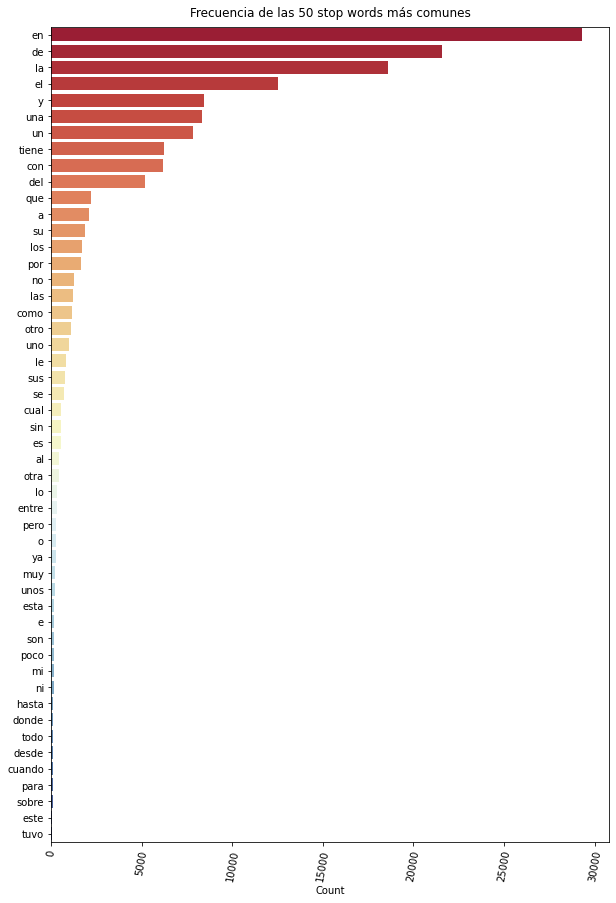

In [25]:
freq_dist_palabras_stopw = [tupl for tupl in freq_dist.most_common() if tupl[0] in esp_stopw]


def plot_freq_n_comunes(data, title=""):
    X = np.array(
        list(
            map(
                lambda x: list(x), data
            )
        )
    )

    fig = plt.figure(figsize=(10,15))
    ax = fig.add_subplot()

    sns.barplot(y=X[:, 0], x=X[:, 1].astype('int'), ax=ax, palette='RdYlBu')
    ax.set_title(title, pad=10)
    ax.set_xlabel('Count')
    ax.tick_params(axis='x', rotation=80)

plot_freq_n_comunes(
    freq_dist_palabras_stopw[0:50],
    "Frecuencia de las 50 stop words más comunes"
)

Ya que exploramos un poco la distribución de las stop words dentro de nuestros datos, procedemos a filtrarlos de nuestra lista de palabras para procesar el texto que realmente nos importa estudiar.

In [13]:
# lista de palabras sin stop words
palabras_no_stopw = [token for token in palabras if token not in esp_stopw]

len(palabras_no_stopw)

171918

En total, sin las stop words contamos con 171918 palabras para analizar.

Contabilizando el número de palabras que nos quedan tras quitar las stop words:

In [14]:
# Quitando las stopwords queda el 50%:

s = f'{100*(len(palabras_no_stopw) / len(palabras)):.3f}%'

print(f'Tras quitar las stopwords queda el {s} de palabras.')

Tras quitar las stopwords queda el 53.479% de palabras.


Como nos interesa hacer un análisis estadístico de las palabras, creamos un objeto `FreqDist` con esta lista obtenida.

In [15]:
freq_dist_palabras_no_stopw = nltk.FreqDist(palabras_no_stopw)
comunes = freq_dist_palabras_no_stopw.most_common()
comunes[:30]

[('cicatriz', 7859),
 ('derecho', 5968),
 ('tatuaje', 5750),
 ('izquierdo', 5355),
 ('lado', 4311),
 ('brazo', 3837),
 ('lunar', 3173),
 ('derecha', 2945),
 ('izquierda', 2483),
 ('espalda', 2320),
 ('forma', 1998),
 ('parte', 1793),
 ('nombre', 1737),
 ('mano', 1737),
 ('pecho', 1642),
 ('tatuajes', 1626),
 ('color', 1491),
 ('leyenda', 1460),
 ('dos', 1404),
 ('pierna', 1376),
 ('cicatrices', 1332),
 ('ceja', 1283),
 ('hombro', 1170),
 ('centimetros', 1157),
 ('cuenta', 1119),
 ('aproximadamente', 1088),
 ('frente', 1041),
 ('cara', 1016),
 ('superior', 949),
 ('altura', 944)]

Calculamos los porcentajes de aparición de las palabras más frecuentes:

In [21]:
tot = len(palabras_no_stopw)
suma = 0
i = 0

for tpl in comunes:
    tmp = 100*freq_dist_palabras_no_stopw[tpl[0]]
    suma = suma + (tmp / tot)
    print(
        f'{i}. Porcentaje de aparicion de {tpl[0]}:{(tmp / tot):.3f}%'
    )
    i+=1
print(f'Total acumulado: {suma:.3f}%')


0. Porcentaje de aparicion de cicatriz:4.571%
1. Porcentaje de aparicion de derecho:3.471%
2. Porcentaje de aparicion de tatuaje:3.345%
3. Porcentaje de aparicion de izquierdo:3.115%
4. Porcentaje de aparicion de lado:2.508%
5. Porcentaje de aparicion de brazo:2.232%
6. Porcentaje de aparicion de lunar:1.846%
7. Porcentaje de aparicion de derecha:1.713%
8. Porcentaje de aparicion de izquierda:1.444%
9. Porcentaje de aparicion de espalda:1.349%
10. Porcentaje de aparicion de forma:1.162%
11. Porcentaje de aparicion de parte:1.043%
12. Porcentaje de aparicion de nombre:1.010%
13. Porcentaje de aparicion de mano:1.010%
14. Porcentaje de aparicion de pecho:0.955%
15. Porcentaje de aparicion de tatuajes:0.946%
16. Porcentaje de aparicion de color:0.867%
17. Porcentaje de aparicion de leyenda:0.849%
18. Porcentaje de aparicion de dos:0.817%
19. Porcentaje de aparicion de pierna:0.800%
20. Porcentaje de aparicion de cicatrices:0.775%
21. Porcentaje de aparicion de ceja:0.746%
22. Porcentaje d

De forma gráfica esta distribución se aprecia en la siguiente figura (aunque se encuentre acotada a los primeros 40):

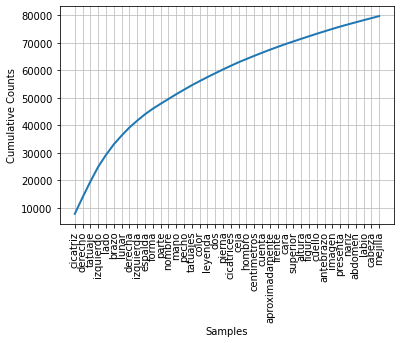

<AxesSubplot: xlabel='Samples', ylabel='Cumulative Counts'>

In [19]:
freq_dist_palabras_no_stopw.plot(40,cumulative=True)

Visualizamos los datos de forma gráfica

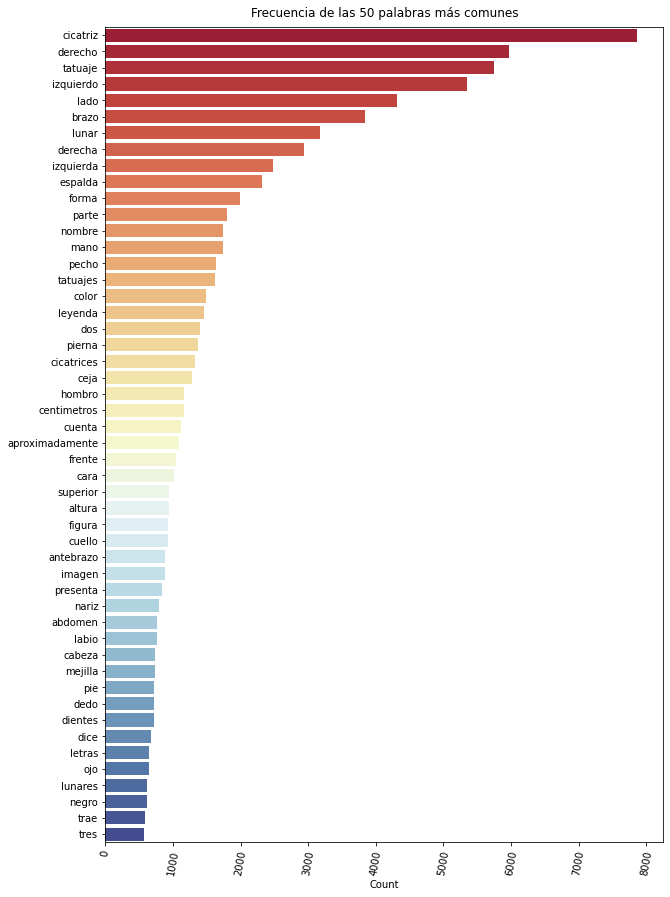

In [26]:
# Frecuencia de las palabras más comunes.

plot_freq_n_comunes(
    freq_dist_palabras_no_stopw.most_common()[0:50],
    "Frecuencia de las 50 palabras más comunes")

Una forma bastante intuitiva de visualizar la distribución es mediante una nube de palabras. Nótese que coincide con las observaciones hechas anteriormente.

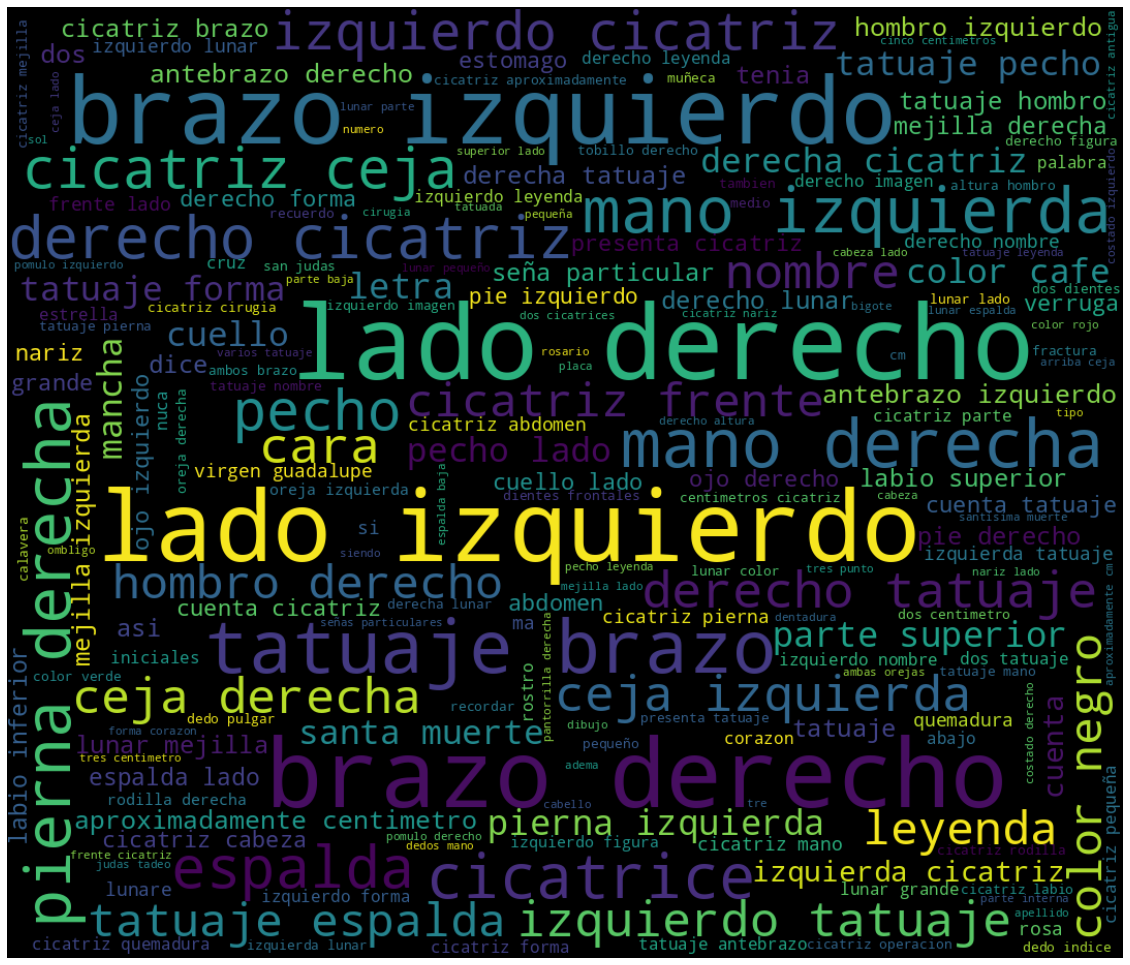

In [31]:
# nube de palabras

nube = WordCloud(width=1080, height=920, max_font_size=100, background_color='black').generate(' '.join(palabras_no_outliers))

plt.figure(figsize=(20,20))
plt.imshow(nube, interpolation='bilinear')
plt.axis('off')
plt.show()

Finalmente, podemos graficar la distribución de los datos con un histograma.

<AxesSubplot: ylabel='Count'>

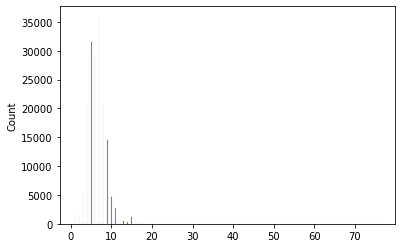

In [28]:
# histograma de la frecuencia de longitudes de palabras y oraciones
# Los outliers no permiten estudiar bien el comportamiento de la distribución

sns.histplot(data=[len(s) for s in palabras_no_stopw])

Podemos investigar cuáles son las palabras que aparecen un 0.001%, es decir aquellas que ocurren sólo una vez. En la siguiente instrucción solo mostramos 50.

In [22]:
print(len(freq_dist_palabras_no_stopw.hapaxes()))
freq_dist_palabras_no_stopw.hapaxes()[:50]

6664


['cinturaforma',
 'tobilloderecha',
 'porquemadura',
 'bicileta',
 'caravaricela',
 'rizadas',
 'sentaderas',
 'rabadulla',
 'andrid',
 'naciente',
 'seja',
 'partede',
 'mantenedor',
 'coyunturas',
 'especificadoa',
 'forna',
 'elva',
 'pzas',
 'mati',
 'ctabique',
 'kgtatuaje',
 'tarahumara',
 'mestiza',
 'acomodado',
 'derechodientes',
 'sagre',
 'elyalma',
 'ubarba',
 'duna',
 'iej',
 'bigoteojos',
 'lono',
 'zafiro',
 'cabrera',
 'quemaron',
 'edmundo',
 'macadentadura',
 'mestizopantalon',
 'cruzado',
 'lunano',
 'pst',
 'vala',
 'redondocicatriz',
 'nedro',
 'palaomas',
 'facturo',
 'ladeandose',
 'pequenas',
 'heridad',
 'lao']

Tenemos un total de 6664 palabras con ocurrencia única. Muchas de estas palabras ocurren una vez por faltas de ortografía.

También hay palabras con un exceso de longitud. Quitando estas palabras podemos mejorar el histograma obtenido antes.

<AxesSubplot: ylabel='Count'>

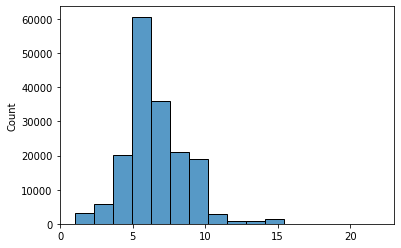

In [29]:
# Quitamos las palabras con más de 23 letas
# De acuerdo con la RAE, la palabra más larga en español tiene 23 letas.

palabras_no_outliers = [w for w in palabras_no_stopw if len(w) < 23]

# graficando el histograma:

sns.histplot(data=[len(s) for s in palabras_no_outliers], bins=16)

# La distribución es aproximadamente normal salvo outliers.

Podemos observar una lista con las 40 palabras más comunes salvo stop words. La más común es cicatriz, seguida de derecho y tatuaje. Será interesante estudiar bajo qué contextos aparecen estas tres palabras. Para esto, generamos un objeto Text que nos permita estudiar justamente esto.

# Exploración de contextos con el objeto Text

Una vez que ya conocemos mejor cuáles son las características más comunes que comparten las personas desaparecidas, procedemos a hacer un análisis de contexto para entender un poco mejor qué otras relaciones poseen estas características con otras, de modo que nos permita caracterizar mejor los valores típicos.

Del análisis estadístico anterior, podemos ver que palabras de interés son:

In [38]:
comunes_contexto = [tpl[0] for tpl in comunes[0:5]]
comunes_contexto

['cicatriz', 'derecho', 'tatuaje', 'izquierdo', 'lado']

Generamos un objeto Text que nos permita estudiar los contextos de interés para obtener información sobre el contexto de nuestras 5 palabras más frecuentes.

In [33]:
text_obj = nltk.Text(palabras)

Investiguemos la riqueza léxica:

In [36]:
# Riqueza lexica

print(f'Porcentaje de riqueza léxica: {100*len(set(text_obj))/len(text_obj):.3f}%')

Porcentaje de riqueza léxica: 3.448%


Por lo tanto, podemos concluir que las descripciones que se encuentran en nuestros registros no son muy ricas.

Obtenemos ademas las colocaciones

In [50]:
text_obj.collocations()

una cicatriz; del lado; lado derecho; lado izquierdo; cuenta con;
brazo derecho; brazo izquierdo; mano derecha; tiene una; santa muerte;
pierna derecha; mano izquierda; seña particular; color negro; que
dice; asi como; color cafe; ceja izquierda; parte superior; ceja
derecha


De las cuales rescatamos bajo qué contextos en común aparecen en particular las palabras _color_ y _cafe_/_negro_

In [51]:
text_obj.common_contexts(['color', 'cafe'])

de_oscuro de_oscura o_tatuaje


In [52]:
text_obj.common_contexts(['color', 'negro'])

de_en con_y con_de y_uno


Analizamos el contexto de cicatriz mediante las funciones `concordance`, y `similar` de las palabras:

* cicatriz 
* derecho, 
* tatuaje, 
* izquierdo, 
* lado

### Contexto de cicatriz

In [39]:
text_obj.concordance(comunes_contexto[0])

Displaying 25 of 7859 matches:
tiene una cicatriz en la rodilla izquierda por una ca
d en el brazo del lado derecho una cicatriz de 5 a 8 cmts a lo largo del brazo
 sexo masculino de emiliano zapata cicatriz en mano derecha tatuajes uno en un
 dos iniciales tatuadas en su piel cicatriz en ceja izquierda sin barba poco b
a imagen de la virgen de guadalupe cicatriz de hernia en una pierna no recuerd
el labio superior del lado derecho cicatriz en el brazo izquierdo en forma de 
o y un lunar en la nalga izquierda cicatriz en ceja izquierda cicatriz lineal 
quierda cicatriz en ceja izquierda cicatriz lineal en pierna derecha cicatriz 
 cicatriz lineal en pierna derecha cicatriz de un centimetro en labio superior
azon padece alzheimer presenta una cicatriz en la sien del lado izquierdo no t
o tiene el ojo izquierdo tiene una cicatriz en la ceja derecha tiene una cicat
atriz en la ceja derecha tiene una cicatriz en la muñeca izquierda no tiene do
senta un lunar en pomulo izquierdo cicatriz en

Podemos observar que el 4-grama que comienza por cicatriz suele incluir la ubicación de dicha cicatriz. Aparentemente el texto detrás de cicatriz no provee mayor información sobre esta.

También, cicatriz suele estar en el mismo contexto que tatuaje, tatuajes, lunar, lunares, perforación, mancha y demás, como se observa en el resultado de la siguiente instrucción.

In [40]:
text_obj.similar(comunes_contexto[0])

tatuaje y lunar cicatrices tatuajes perforacion tiene de otro lunares
mancha uno una en manchas verruga grande operacion arriba pecas


### Contexto de derecho

In [41]:
text_obj.concordance(comunes_contexto[1])

Displaying 25 of 5968 matches:
 de mancha cicatrices a un lado ojo derecho manchas en el tobilloderecha causad
e dos tatuajes en el pecho del lado derecho el nombre de miriam y del lado izqu
 de juan david en el brazo del lado derecho una cicatriz de 5 a 8 cmts a lo lar
rices en la cabeza tatuaje en brazo derecho con la figura de una persona del se
 del cuello y un grano en el hombro derecho pecas en la cara tiene un lunar arr
 arriba del labio superior del lado derecho cicatriz en el brazo izquierdo en f
 de un centimetro en labio superior derecho acne en la cara tatuaje en el anteb
erdo cicatriz en la frente del lado derecho a la altura de la ceja cicatriz en 
bligo cicatriz en la cabeza de lado derecho cicatriz en ceja derecha y lunar en
 en mejilla derecha renguea del pie derecho tiene un piercing en el obligo una 
 le falta un pedazo del dedo indice derecho tiene una cicatriz en la parte inte
ede arriba tatuaje dragòn en hombro derecho tatuajes en forma de alacran en la 
erdo tien

A diferencia de cicatriz, derecho si viene acompañada de más información relevante de ambos lados.

Además, esta palabra como es de esperarse aparece en los contextos semejantes a la palabra _izquierda_ y sus variaciones, al igual que partes del cuerpo.

In [42]:
text_obj.similar(comunes_contexto[1])

izquierdo y tiene de izquierda tatuaje en cicatriz con derecha izq
otro lunar un trae cuello una superior pecho abdomen


### Contexto de tatuaje

In [43]:
text_obj.concordance(comunes_contexto[2])

Displaying 25 of 5750 matches:
adas en unos de sus brazos tiene un tatuaje en unos de sus brazos las cuales so
 a lo largo del brazo bigote escaso tatuaje en forma de cruz en el brazo izquie
rdo y varias ciatrices en la cabeza tatuaje en brazo derecho con la figura de u
erda sin barba poco bigote tiene un tatuaje en el cuello del lado izquierdo con
erdo con la figura de un alacran un tatuaje con la figura de un payaso en una d
rostro como paño lunar en el menton tatuaje con la leyenda andrid y la imagen d
io superior derecho acne en la cara tatuaje en el antebrazo izquierdo tatuaje e
a tatuaje en el antebrazo izquierdo tatuaje en la espalda herida en el dedo pul
iz en seja izquierda señas vicibles tatuaje en una mano tiene dentadura nueva e
entadura nueva en la partede arriba tatuaje dragòn en hombro derecho tatuajes e
izquierda tiene dificultad para ver tatuaje en el cuello con el nombre isabel p
ciones de largo hasta media espalda tatuaje en el brazo derecho con la leyenda 
rosa en e

La palabra tatuaje es un poco más volatil, en tanto que en muchos contextos viene acompañada de una breve descripción de este, en otros viene acompañada de su posición en el cuerpo, y otras ocasiones viene sola.

Las palabras que aparecen en contextos similares a _tatuaje_ son las que se observan como resultado de la siguiente celda. Obsérvese que tatuaje se encuentra en contextos semejantes a otros buenos distintivos de personas como lo son lunares, manchas y cicatrices.

In [44]:
text_obj.similar(comunes_contexto[2])

cicatriz y lunar tatuajes cicatrices otro lunares uno perforacion
tiene cuenta una de en manchas mancha izquierdo derecho grande como


### Contexto de izquierdo

In [45]:
text_obj.concordance(comunes_contexto[3])

Displaying 25 of 5355 matches:
uello en indice izq y arco del pie izquierdo en la pierna izquierda ya que se l
cho el nombre de miriam y del lado izquierdo el nombre de juan david en el braz
tuaje en forma de cruz en el brazo izquierdo y varias ciatrices en la cabeza ta
e un tatuaje en el cuello del lado izquierdo con la figura de un alacran un tat
 lado derecho cicatriz en el brazo izquierdo en forma de u cerca del codo y un 
en la cara tatuaje en el antebrazo izquierdo tatuaje en la espalda herida en el
a espalda herida en el dedo pulgar izquierdo tiene lunar en el cuello tiene el 
a una cicatriz en la sien del lado izquierdo no tiene el ojo izquierdo tiene un
del lado izquierdo no tiene el ojo izquierdo tiene una cicatriz en la ceja dere
miriam presenta un lunar en pomulo izquierdo cicatriz en la frente del lado der
quierda lunar en el menton de lado izquierdo y otra en el pecho de 10 cm aprox 
na calavera que dice beto en brazo izquierdo un dragon usa bigote recortado tie
triz en l

Al igual que la palabra _derecho_, la palabra _izquierdo_ viene acompañada de alguna seña característica de la persona extraviada. Es de esperarse que esta palabra aparezca en contextos similares a _derecho_, _tatuaje_ y _cicatriz_ o alguna parte del cuerpo.

In [46]:
text_obj.similar(comunes_contexto[3])

derecho y tiene de tatuaje en cicatriz izquierda con izq trae otro una
un cuello pecho derecha lunar estomago abdomen


### Contexto de lado

In [47]:
text_obj.concordance(comunes_contexto[4])

Displaying 25 of 4311 matches:
es en ceja izquierda y una mas en el lado izquie lunares a la altura de la cin
nturaforma de mancha cicatrices a un lado ojo derecho manchas en el tobilloder
a tiene dos tatuajes en el pecho del lado derecho el nombre de miriam y del la
do derecho el nombre de miriam y del lado izquierdo el nombre de juan david en
nombre de juan david en el brazo del lado derecho una cicatriz de 5 a 8 cmts a
te tiene un tatuaje en el cuello del lado izquierdo con la figura de un alacra
ernia en una pierna no recuerdan que lado tiene un lunar atras del cuello y un
 lunar arriba del labio superior del lado derecho cicatriz en el brazo izquier
presenta una cicatriz en la sien del lado izquierdo no tiene el ojo izquierdo 
 izquierdo cicatriz en la frente del lado derecho a la altura de la ceja cicat
reja izquierda lunar en el menton de lado izquierdo y otra en el pecho de 10 c
del ombligo cicatriz en la cabeza de lado derecho cicatriz en ceja derecha y l
na cicatriz en la reg

Notemos que lado siempre aparece en un bigrama junto con izquierdo o derecho como es de esperarse. Esto lo podemos comprobar con los contextos comunes.

In [49]:
text_obj.common_contexts([comunes_contexto[3], 'izquierdo', 'derecho'])

brazo_con lado_de lado_tiene brazo_tiene brazo_en lado_cicatriz lado_y
lado_en lado_con lado_del brazo_y brazo_de lado_tatuaje brazo_un
lado_una antebrazo_con brazo_una brazo_la brazo_cicatriz brazo_a


In [48]:
text_obj.similar(comunes_contexto[3])

derecho y tiene de tatuaje en cicatriz izquierda con izq trae otro una
un cuello pecho derecha lunar estomago abdomen


# Estudio de n-gramas

Tras estudiar de forma individual a las palabras en la sección anterior, procedemos a estudiarlas en conjuntos de 2 y 3 palabras consecutivas.

Obtenemos los bigramas más comunes y su frecuencia

In [53]:
# bigramas más comunes y su frecuencia

freq_dist_bigramas = nltk.FreqDist(list(nltk.bigrams(text_obj)))
freq_dist_bigramas

FreqDist({('en', 'la'): 9034, ('en', 'el'): 8789, ('cicatriz', 'en'): 4747, ('de', 'la'): 3855, ('tatuaje', 'en'): 3652, ('una', 'cicatriz'): 2853, ('el', 'brazo'): 2150, ('con', 'la'): 2053, ('un', 'tatuaje'): 2004, ('del', 'lado'): 1971, ...})

Debido a que en las anteriores instrucciones consideramos también a las stop words para el análisis, y estas no agregan mucho a la semántica, volvemos a realizar el análisis de frecuencias pero ahora con el conjunto de palabras sin stop words.

In [54]:
# bigramas sin las stopw y su frecuencia.

freq_dist_bigramas = nltk.FreqDist(
    list(
        nltk.bigrams(
            nltk.Text(palabras_no_stopw)
        )
    )
)

freq_dist_bigramas

FreqDist({('lado', 'derecho'): 1918, ('lado', 'izquierdo'): 1718, ('brazo', 'derecho'): 1619, ('brazo', 'izquierdo'): 1510, ('tatuaje', 'brazo'): 865, ('mano', 'derecha'): 747, ('pierna', 'derecha'): 658, ('mano', 'izquierda'): 657, ('derecho', 'cicatriz'): 588, ('izquierdo', 'cicatriz'): 512, ...})

En el resultado de la línea anterior corraboramos nuestra observación hecha antes sobre los contextos en los que aparecían las cinco palabras más comunes.

Ahora graficamos la distribución de los bigramas.

/tmp/ipykernel_34173/2726476188.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(


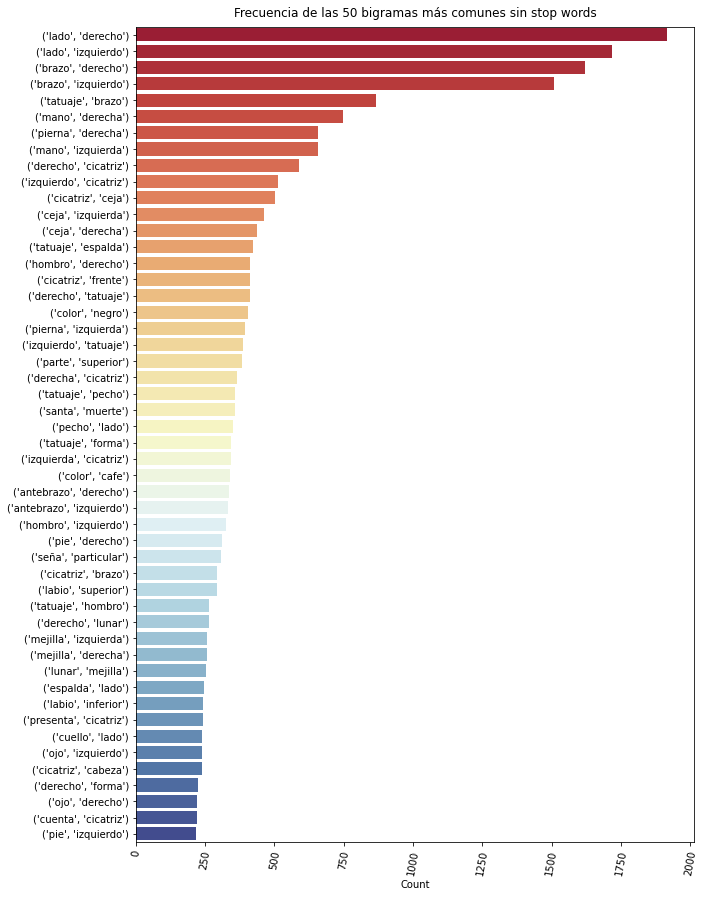

In [55]:
plot_freq_n_comunes(freq_dist_bigramas.most_common(50), 'Frecuencia de las 50 bigramas más comunes sin stop words')

Con bigramas no obtenemos mucha información sobre rasgos caracteristicos que presentan los registros. Es por este motivo que consideramos trigramas.

In [56]:
# trigramas sin las stopw y su frecuencia.

freq_dist_trigramas = nltk.FreqDist(
    list(
        ngrams(
            nltk.Text(palabras_no_stopw), 3
        )
    )
)

freq_dist_trigramas

FreqDist({('tatuaje', 'brazo', 'derecho'): 422, ('tatuaje', 'brazo', 'izquierdo'): 339, ('lado', 'derecho', 'cicatriz'): 249, ('cicatriz', 'ceja', 'izquierda'): 207, ('pecho', 'lado', 'izquierdo'): 206, ('lado', 'izquierdo', 'cicatriz'): 191, ('cicatriz', 'ceja', 'derecha'): 188, ('tatuaje', 'hombro', 'derecho'): 131, ('lado', 'derecho', 'tatuaje'): 128, ('cicatriz', 'brazo', 'izquierdo'): 126, ...})

/tmp/ipykernel_34173/2726476188.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(


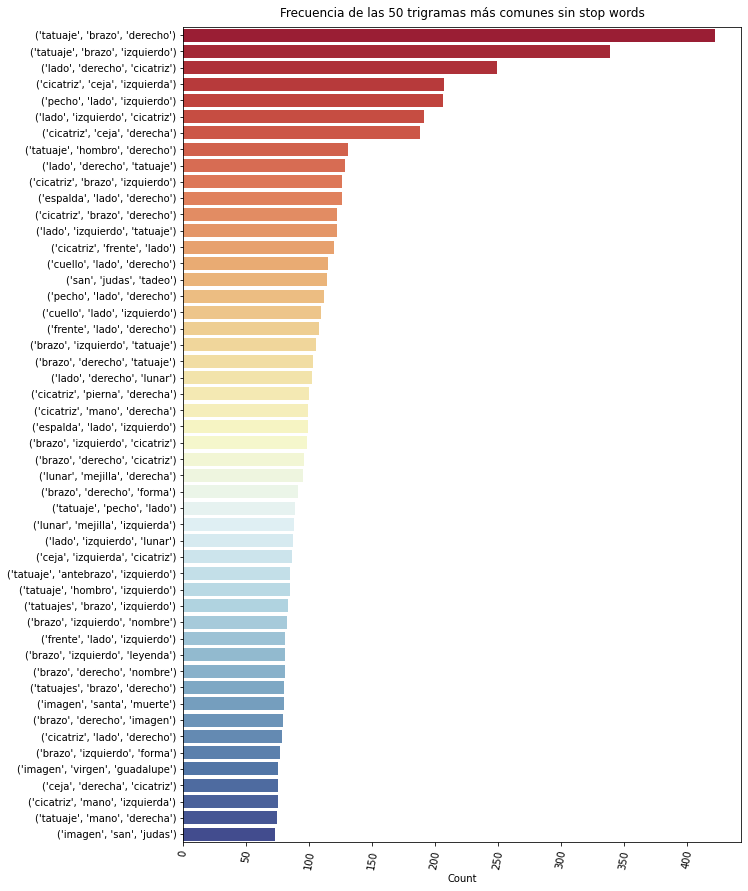

In [57]:
plot_freq_n_comunes(freq_dist_trigramas.most_common(50), 'Frecuencia de las 50 trigramas más comunes sin stop words')

Claramente ahora obtenemos información más útil no solo sobre un rasgo característico del registro sino que también su posición.

# Análisis de sentimientos

En tanto que nuestros datos son neutros en sentimiento al ser parte de una descripción, no hay nada que reportar en eso.

# Conclusiones preliminares

Podemos concluir a partir del análisis realizado:

* La riqueza léxica es baja, y por lo tanto las descripciones resultan un poco pobres. Muy probablemente esto se deba a que dichas descripciones deben ser concisas y breves.

* El rasgo característico más frecuente fue cicatriz, seguida de tatuaje. Por lo tanto, muchos de los registros presentan cicatrices, tatuajes o ambos. De acuerdo con nuestro análisis de trigramas, los tatuajes suelen encontrarse en los brazos; y la cicatriz está presente con mayor fecuencia en la ceja.

* Mediante procesamiento de los trigramas podemos obtener la posición de los rasgos particulares.
